In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
df_raw = pd.read_csv("nutritions.csv")
df_raw.shape

(2346, 15)

In [5]:
df_cleaned = df_raw.dropna()
df_cleaned.shape

(1879, 15)

In [6]:
sum_proximates = df_cleaned[['Ash', 'Fat', 'Protein', 'Carbohydrate', 'Water']].sum(axis=1)
df = df_cleaned[(sum_proximates>=99) & (sum_proximates<=101)]
df.shape

(1727, 15)

## 2a) Create a scatter plot to display the values of Energy and Fat for Fast Foods and Sweets.
    Use different colors (or markers) for the two food groups.

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


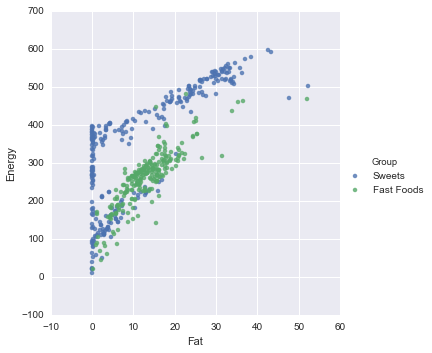

In [7]:
df_ff_sweets = df[(df.Group=='Fast Foods') | (df.Group=='Sweets')]
sns.lmplot('Fat', 'Energy', data=df_ff_sweets, fit_reg=False, hue='Group')

## 2b) Create a bar plot to compare the mean Fat value of food items that contain "egg", "apple", and "chocolate" respectively.
Use df[df.Food.str.lower().str.contains('egg')] to get food items that contain "egg". Do the same for "apple" and "chocolate".
Separate Sweets and Fast Foods in the comparison. Ignore other food groups.
The bar plot should contain confidence intervals for the mean values.

C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Karthik\Anaconda3\lib\site-packages\pandas\core\indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


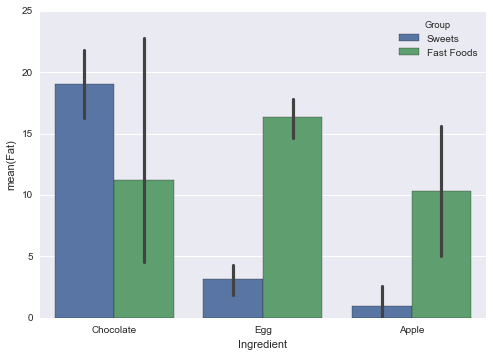

In [8]:
df_ff_sweets['Ingredient'] = 'Other'
df_ff_sweets.loc[df_ff_sweets.Food.str.lower().str.contains('egg'), 'Ingredient'] = 'Egg'
df_ff_sweets.loc[df_ff_sweets.Food.str.lower().str.contains('apple'), 'Ingredient'] = 'Apple'
df_ff_sweets.loc[df_ff_sweets.Food.str.lower().str.contains('chocolate'), 'Ingredient'] = 'Chocolate'
df_3_ingrd = df_ff_sweets[ df_ff_sweets.Ingredient.isin(['Egg','Apple','Chocolate']) ]
_ = sns.barplot('Ingredient', 'Fat', data=df_3_ingrd, hue='Group')

## 2c) Create a box plot for the same groups of data as above.
Explain the similarity and difference between this plot and the previous plot.

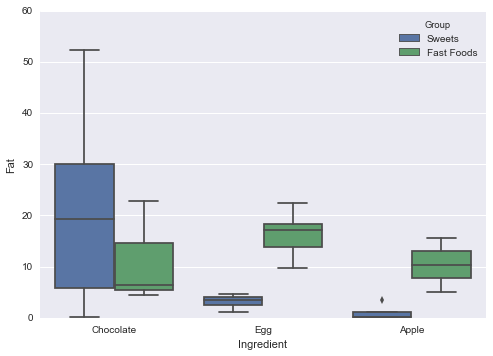

In [9]:
_ = sns.boxplot('Ingredient', 'Fat', data=df_3_ingrd, hue='Group')

    The similarity between the barplot and the boxplot is that they both denote something about how much fat content is there in sweets and fast foods that contain egg, apple and chocolate.
    
    The difference between them is that the barplot denotes the mean and the 95% confidence interval of the fat values whereas the boxplot denotes the median and quartiles of the fat values.

## 2d) Create a stacked bar chart comparing the mean values of all five proximates (fat, protein, carbs, ash, and water) for all food groups.

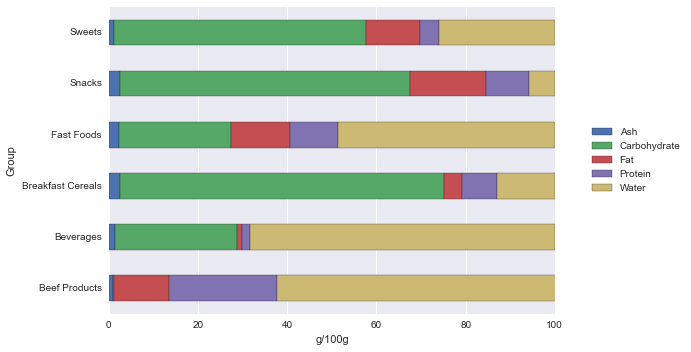

In [10]:
# df_by_group = df.groupby('Group')
# df_proximates = df[['Fat','Protein','Carbohydrate','Ash','Water']]
df_proximates_pivot =  df.pivot_table(index='Group', values=['Fat','Protein','Carbohydrate','Ash','Water'], aggfunc=np.mean)
df_proximates_pivot.head()
df_proximates_pivot.plot(kind='barh', stacked=True)
plt.xlabel("g/100g")
plt.xlim(0,100)
_ = plt.legend(loc="center right", bbox_to_anchor=(1.3,0.5))

## 2e) Create two histograms showing the distribution of Fat for Fat Foods, using 10 bins and 100 bins respectively.
* Plot two histograms as the subplots of a single figure.
* Optionally, add a Gaussian kernel density plot to each histogram.

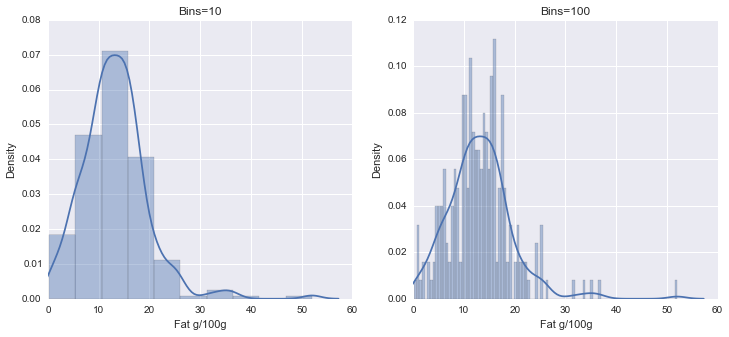

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
df_ff = df[(df.Group == 'Fast Foods')]
df_ff_fat = df_ff[['Fat']]
sns.distplot(df_ff_fat['Fat'], bins=10, norm_hist=False, kde=True, ax=axes[0], axlabel='Fat g/100g')
axes[0].set_ylabel("Density")
axes[0].set_title("Bins=10")
axes[0].set_xlim(0,60)
sns.distplot(df_ff_fat['Fat'], bins=100, kde=True, norm_hist=False, ax=axes[1], axlabel='Fat g/100g')
axes[1].set_xlim(0,60)
axes[1].set_ylabel("Density")
axes[1].set_title("Bins=100")

## 2f) Create a scatter plot matrix (SPLOM) displaying the relations among Energy, Fat, Protein, and Carbohydrate.
    Separate Sweets and Fast Foods in the comparison. Ignore other food groups.

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


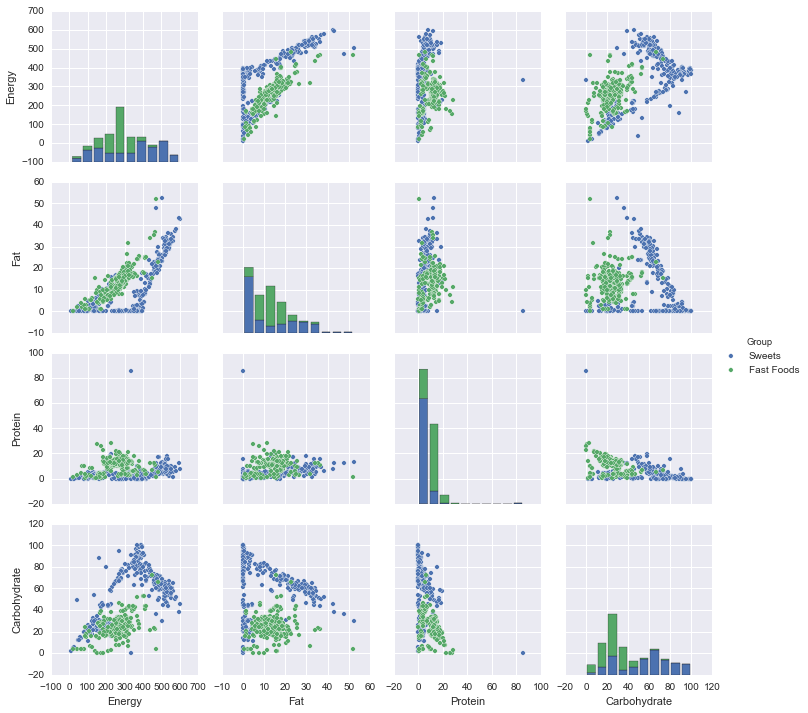

In [12]:
df_spm = df_ff_sweets[['Energy', 'Fat', 'Protein', 'Carbohydrate', 'Group']]
sns.pairplot(df_spm, hue='Group')

## 2g) Create two scatter plots with a fitted curve displaying the relationship of Energy vs. Fat among Fast Foods. Use linear fit and 2nd-order polynomial fit respectively.
* Plot two plots as the subplots of a single figure.
* Display confidence intervals for both plots.

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


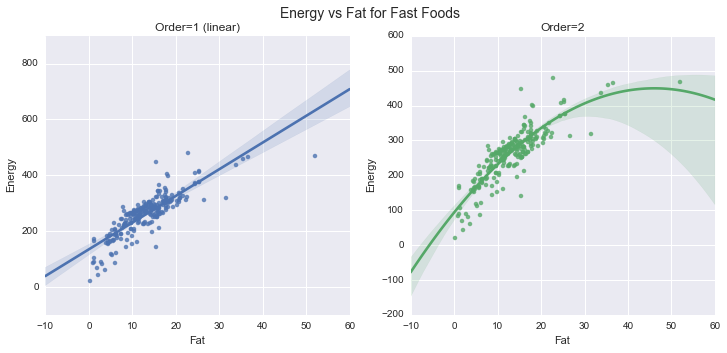

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
fig.suptitle("Energy vs Fat for Fast Foods", fontsize=14)
sns.regplot('Fat', 'Energy', data=df_ff, ax=axes[0])
sns.regplot('Fat', 'Energy', data=df_ff, order=2, ax=axes[1])
axes[0].set_title("Order=1 (linear)")
axes[1].set_title("Order=2")

## 2h) Create a scatterplot with marginal histograms for Energy vs. Fat among Fast Foods.

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


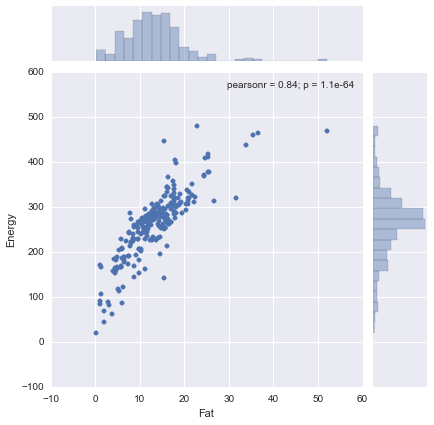

In [14]:
sns.jointplot('Fat','Energy',data=df_ff)

## 3a) Create a linear regression model of Energy from Fat for Fast Foods, which should be identical to the one created in the previous homework.

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model1 = smf.ols('Energy ~ Fat', data=df_ff).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     559.8
Date:                Mon, 19 Oct 2015   Prob (F-statistic):           1.13e-64
Time:                        16:27:18   Log-Likelihood:                -1239.8
No. Observations:                 242   AIC:                             2484.
Df Residuals:                     240   BIC:                             2490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    134.6526      5.934     22.692      0.000       122.963   146.342
Fat            9.5708      0.404     23.661      0.000         8.774    10.368
==============================================================================
Omnibus:                       31.267   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.528
Skew:                          -0.540   Prob(JB):                     1.62e-19
Kurtosis:                       5.723   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3b) Which item in Fast Foods has the highest Fat? Do you think (make a guess) if it is an outlier in the regression model?

In [16]:
max_fat_item = df_ff.ix[df_ff['Fat'].idxmax()]
max_fat_food = max_fat_item.Food
max_fat = max_fat_item.Fat
max_fat_energy = max_fat_item.Energy
print("The fast food having the highest fat is: ", max_fat_food)
print("Fat content: ", max_fat)
print("Energy content: ", max_fat_energy)

The fast food having the highest fat is:  McDONALD'S, Creamy Ranch Sauce
Fat content:  52.03
Energy content:  468.0


    I think that Creamy Ranch Sauce is an outlier. We except it's energy content to be around 600 units from the regression model. However it has an energy content of only 468.

## 3c) Use an appropriate diagnostic statistic (DFFITS, Cook's distance, studentized residuals, ...) of your choice to find the outliers in the regression model.

In [17]:
influence = model1.get_influence()
cooks_distance = influence.cooks_distance[0]
number_of_observations = len(cooks_distance)

cooks_threshold = 4/number_of_observations
df_outliers = df_ff[(cooks_distance > cooks_threshold)]
df_outliers[['Food', 'Fat', 'Energy']]

,Food,Fat,Energy
1529,"Fast foods, potato, mashed",2.82,89
1617,"McDONALD'S, Creamy Ranch Sauce",52.03,468
1620,"McDONALD'S, Spicy Buffalo Sauce",15.45,142
1631,"McDONALD'S, McDONALDLAND Chocolate Chip Cookies",22.79,480
1632,"McDONALD'S, McDONALDLAND Cookies",15.35,447
1653,"McDONALD'S, NEWMAN'S OWN Creamy Caesar Dressing",31.50,319
1654,"McDONALD'S, NEWMAN'S OWN Low Fat Balsamic Vina...",5.94,86
1655,"McDONALD'S, NEWMAN'S OWN Ranch Dressing",26.57,313
1674,"McDONALD'S, Caesar Salad with Grilled Chicken",1.90,68
1676,"McDONALD'S, Caesar Salad without chicken",2.05,44


In [18]:
outlier_criterion = (cooks_distance > cooks_threshold)
outlier_indexes = np.nonzero(outlier_criterion)

df_ff_cleaned = df_ff[~ outlier_criterion]
model2 = smf.ols('Energy ~ Fat', data=df_ff_cleaned).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     694.0
Date:                Mon, 19 Oct 2015   Prob (F-statistic):           1.50e-70
Time:                        16:27:21   Log-Likelihood:                -1088.2
No. Observations:                 226   AIC:                             2180.
Df Residuals:                     224   BIC:                             2187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    139.9323      5.147     27.188      0.000       129.790   150.075
Fat            9.4747      0.360     26.344      0.000         8.766    10.183
==============================================================================
Omnibus:                        5.856   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.521
Skew:                          -0.347   Prob(JB):                       0.0633
Kurtosis:                       3.324   Cond. No.                         37.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    Coefficients
    * Intercept: 139.94
    * Slope: 9.47
    R-squared: 0.756
    Confidence intervals
    * Intercept: (129.79, 150.01)
    * Slope: (8.77, 10.18)

## 3e) Create a new scatterplot, showing all the data points, and both the old and the new regression lines.

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


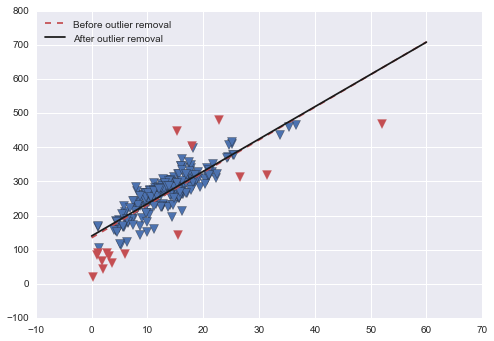

In [19]:
plt.scatter(df_ff_cleaned['Fat'], df_ff_cleaned['Energy'], s=80, marker='v')
plt.scatter(df_outliers['Fat'], df_outliers['Energy'], color='r', s=80, marker='v')

xs = np.linspace(0, 60, 2)
ys1 = model1.predict({'Fat': xs})
ys2 = model2.predict({'Fat': xs})
plt.plot(xs, ys1, 'r--', label="Before outlier removal")
plt.plot(xs, ys2, 'k', label="After outlier removal")

plt.legend(loc="upper left")

## 3f) Repeat steps (c) - (e) using a different statistic. Compare the results generated by both statistics.

In [20]:
influence = model1.get_influence()
dffits = influence.dffits[0]
number_of_observations = len(dffits)
number_of_parameters = 2

dffits_threshold = 2 * np.sqrt(number_of_parameters/number_of_observations)
df_outliers = df_ff[(np.abs(dffits) > dffits_threshold)]
df_outliers[['Food', 'Fat', 'Energy']]

,Food,Fat,Energy
1529,"Fast foods, potato, mashed",2.82,89
1617,"McDONALD'S, Creamy Ranch Sauce",52.03,468
1620,"McDONALD'S, Spicy Buffalo Sauce",15.45,142
1631,"McDONALD'S, McDONALDLAND Chocolate Chip Cookies",22.79,480
1632,"McDONALD'S, McDONALDLAND Cookies",15.35,447
1653,"McDONALD'S, NEWMAN'S OWN Creamy Caesar Dressing",31.50,319
1654,"McDONALD'S, NEWMAN'S OWN Low Fat Balsamic Vina...",5.94,86
1655,"McDONALD'S, NEWMAN'S OWN Ranch Dressing",26.57,313
1674,"McDONALD'S, Caesar Salad with Grilled Chicken",1.90,68
1675,"McDONALD'S, Caesar Salad with Crispy Chicken",5.31,113


In [21]:
outlier_criterion = (np.abs(dffits) > dffits_threshold)
outlier_indexes = np.nonzero(outlier_criterion)

df_ff_cleaned = df_ff[~ outlier_criterion]
model2 = smf.ols('Energy ~ Fat', data=df_ff_cleaned).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     692.7
Date:                Mon, 19 Oct 2015   Prob (F-statistic):           2.43e-70
Time:                        16:27:27   Log-Likelihood:                -1080.5
No. Observations:                 225   AIC:                             2165.
Df Residuals:                     223   BIC:                             2172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    141.4503      5.113     27.664      0.000       131.374   151.527
Fat            9.3859      0.357     26.320      0.000         8.683    10.089
==============================================================================
Omnibus:                        5.357   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.015
Skew:                          -0.322   Prob(JB):                       0.0815
Kurtosis:                       3.348   Cond. No.                         37.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    Coefficients
    * Intercept: 141.45
    * Slope: 9.39
    R-squared: 0.756
    Confidence intervals
    * Intercept: (131.37, 151.53)
    * Slope: (8.68, 10.09)

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


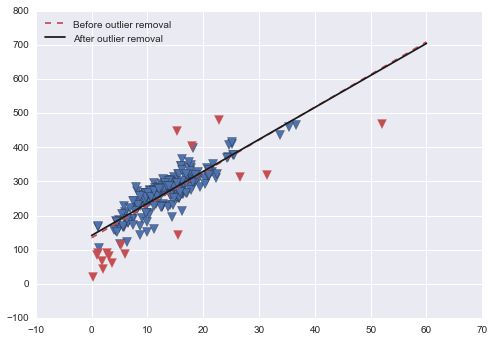

In [22]:
plt.scatter(df_ff_cleaned['Fat'], df_ff_cleaned['Energy'], s=80, marker='v')
plt.scatter(df_outliers['Fat'], df_outliers['Energy'], color='r', s=80, marker='v')

xs = np.linspace(0, 60, 2)
ys1 = model1.predict({'Fat': xs})
ys2 = model2.predict({'Fat': xs})
plt.plot(xs, ys1, 'r--', label="Before outlier removal")
plt.plot(xs, ys2, 'k', label="After outlier removal")

plt.legend(loc="upper left")

## 4a) What is the limitation of the plotting functionality provided by pandas? Can you provide a specific example to support your argument? What alternative(s) do you use instead and why?

    Pandas does not let us control the legend, subplot titles and the limits of the axes. For example, in 2d) the stacked bar plot looks better when the limit is between 0 and 100. But this was not possible using pandas. The alternatives we use are matplotlib and seaborn.

## 4b) Among all the plots you make in Problem 2, which ones are showing quantitative variables? Which ones are showing nominal (categorical) variables? Which ones are involved with both?

    Quantitative: a), e), f), g), h)
    Nominal: b), c), d)
    Both: b), c), d)

## 4c) Based on (b), explain how seaborn makes certain types of plots significantly easier to produce compared to using pandas and matplotlib.

    Seaborn makes it easy to plot a regression line with confidence intervals around it, to make graphs that show a third nominal dimension in addition to two quantitative variables and to make density distribution curves when making histograms.